You are given an m x n integer array grid where grid[i][j] could be:

    1 representing the starting square. There is exactly one starting square.
    2 representing the ending square. There is exactly one ending square.
    0 representing empty squares we can walk over.
    -1 representing obstacles that we cannot walk over.

Return the number of 4-directional walks from the starting square to the ending square, that walk over every non-obstacle square exactly once.

 

Example 1:

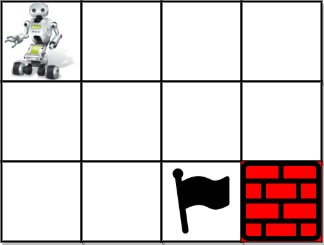

Input: grid = [[1,0,0,0],[0,0,0,0],[0,0,2,-1]]
Output: 2
Explanation: We have the following two paths: 
1. (0,0),(0,1),(0,2),(0,3),(1,3),(1,2),(1,1),(1,0),(2,0),(2,1),(2,2)
2. (0,0),(1,0),(2,0),(2,1),(1,1),(0,1),(0,2),(0,3),(1,3),(1,2),(2,2)

Example 2:

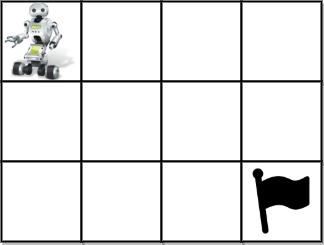

Input: grid = [[1,0,0,0],[0,0,0,0],[0,0,0,2]]
Output: 4
Explanation: We have the following four paths: 
1. (0,0),(0,1),(0,2),(0,3),(1,3),(1,2),(1,1),(1,0),(2,0),(2,1),(2,2),(2,3)
2. (0,0),(0,1),(1,1),(1,0),(2,0),(2,1),(2,2),(1,2),(0,2),(0,3),(1,3),(2,3)
3. (0,0),(1,0),(2,0),(2,1),(2,2),(1,2),(1,1),(0,1),(0,2),(0,3),(1,3),(2,3)
4. (0,0),(1,0),(2,0),(2,1),(1,1),(0,1),(0,2),(0,3),(1,3),(1,2),(2,2),(2,3)

Example 3:

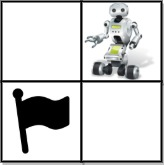

Input: grid = [[0,1],[2,0]]
Output: 0
Explanation: There is no path that walks over every empty square exactly once.
Note that the starting and ending square can be anywhere in the grid.

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 20
    1 <= m * n <= 20
    -1 <= grid[i][j] <= 2
    There is exactly one starting cell and one ending cell.



In [29]:
from typing import List
from collections import deque

class Solution:
    def uniquePathsIII(self, grid: List[List[int]]) -> int:
        max_i = len(grid)
        max_j = len(grid[0])
        l = 0
        q = deque()
        for i in range(max_i):
            for j in range(max_j):
                if grid[i][j] != -1:
                    l += 1
                if grid[i][j] == 1:
                    start = (i, j)
                if grid[i][j] == 2:
                    finish = (i, j)

        ans = 0
        q.append([start, []])
        while q:
            curr, hist = q.popleft()
            hist.append(curr)
            if curr == finish:
                if len(hist) == l:
                    ans += 1
                continue
            if curr[0] > 0 and (curr[0] - 1, curr[1]) not in hist and grid[curr[0] - 1][curr[1]] != -1:
                q.append(((curr[0] - 1, curr[1]), hist.copy()))
            if curr[1] > 0 and (curr[0], curr[1] - 1) not in hist and grid[curr[0]][curr[1] - 1] != -1:
                q.append(((curr[0], curr[1] - 1), hist.copy()))
            if curr[0] < max_i - 1 and (curr[0] + 1, curr[1]) not in hist and grid[curr[0] + 1][curr[1]] != -1:
                q.append(((curr[0] + 1, curr[1]), hist.copy()))
            if curr[1] < max_j - 1 and (curr[0], curr[1] + 1) not in hist and grid[curr[0]][curr[1] + 1] != -1:
                q.append(((curr[0], curr[1] + 1), hist.copy()))

        return ans
        

In [30]:
s = Solution()
s.uniquePathsIII([[1,0,0,0],[0,0,0,0],[0,0,2,-1]])

2